# Loading packages

In [1]:
#!pip3 install pysolve3 ## If pysolve3 is not installed

%config InlineBackend.figure_format = 'retina'

from SFC_Setup import *

/home/gpetrini/.local/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# Plugging real data

In [2]:
data = pd.read_csv('../data/Data_yeojohnson.csv')

data = data[[
    "Interest rate", 
    "Inflation", 
    "gIh", 
    "Own Interest rate",
]]

data.head()

,Interest rate,Inflation,gIh,Own Interest rate
0,0.0898,0.002985,0.065517,0.120443
1,0.0843,0.000760,0.052722,0.114776
2,0.0802,-0.001179,0.007945,0.111158
3,0.0814,0.005732,0.063046,0.100196
4,0.0750,0.002504,0.011942,0.095222


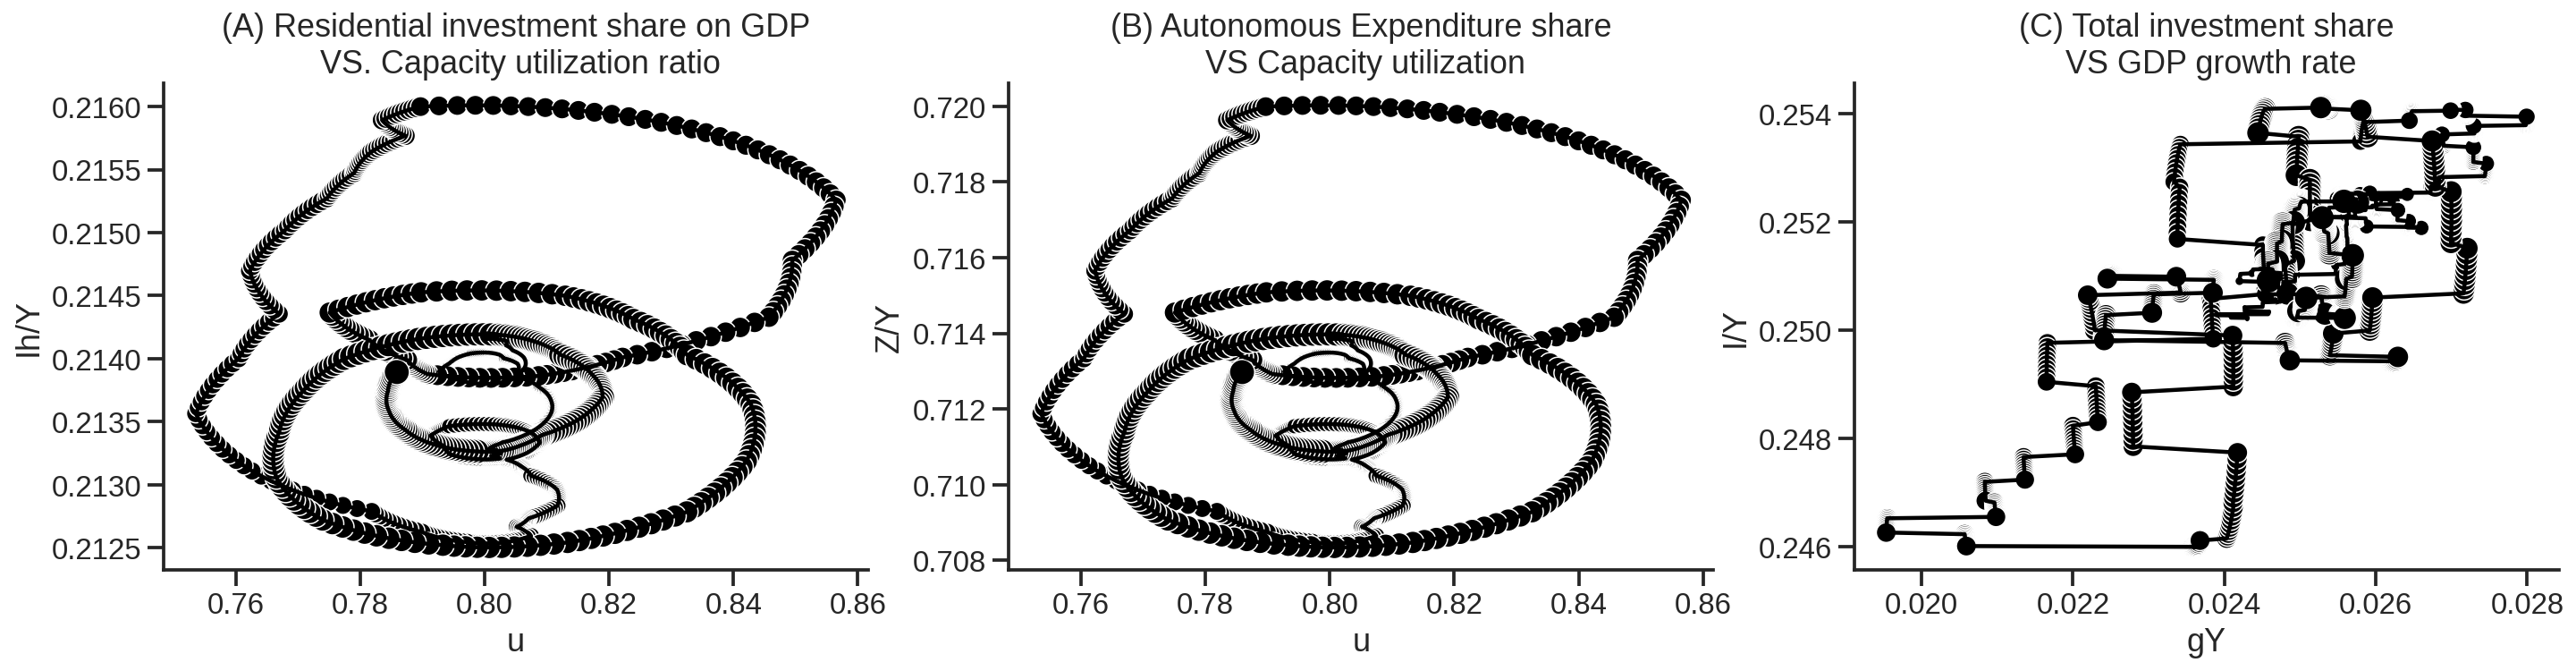

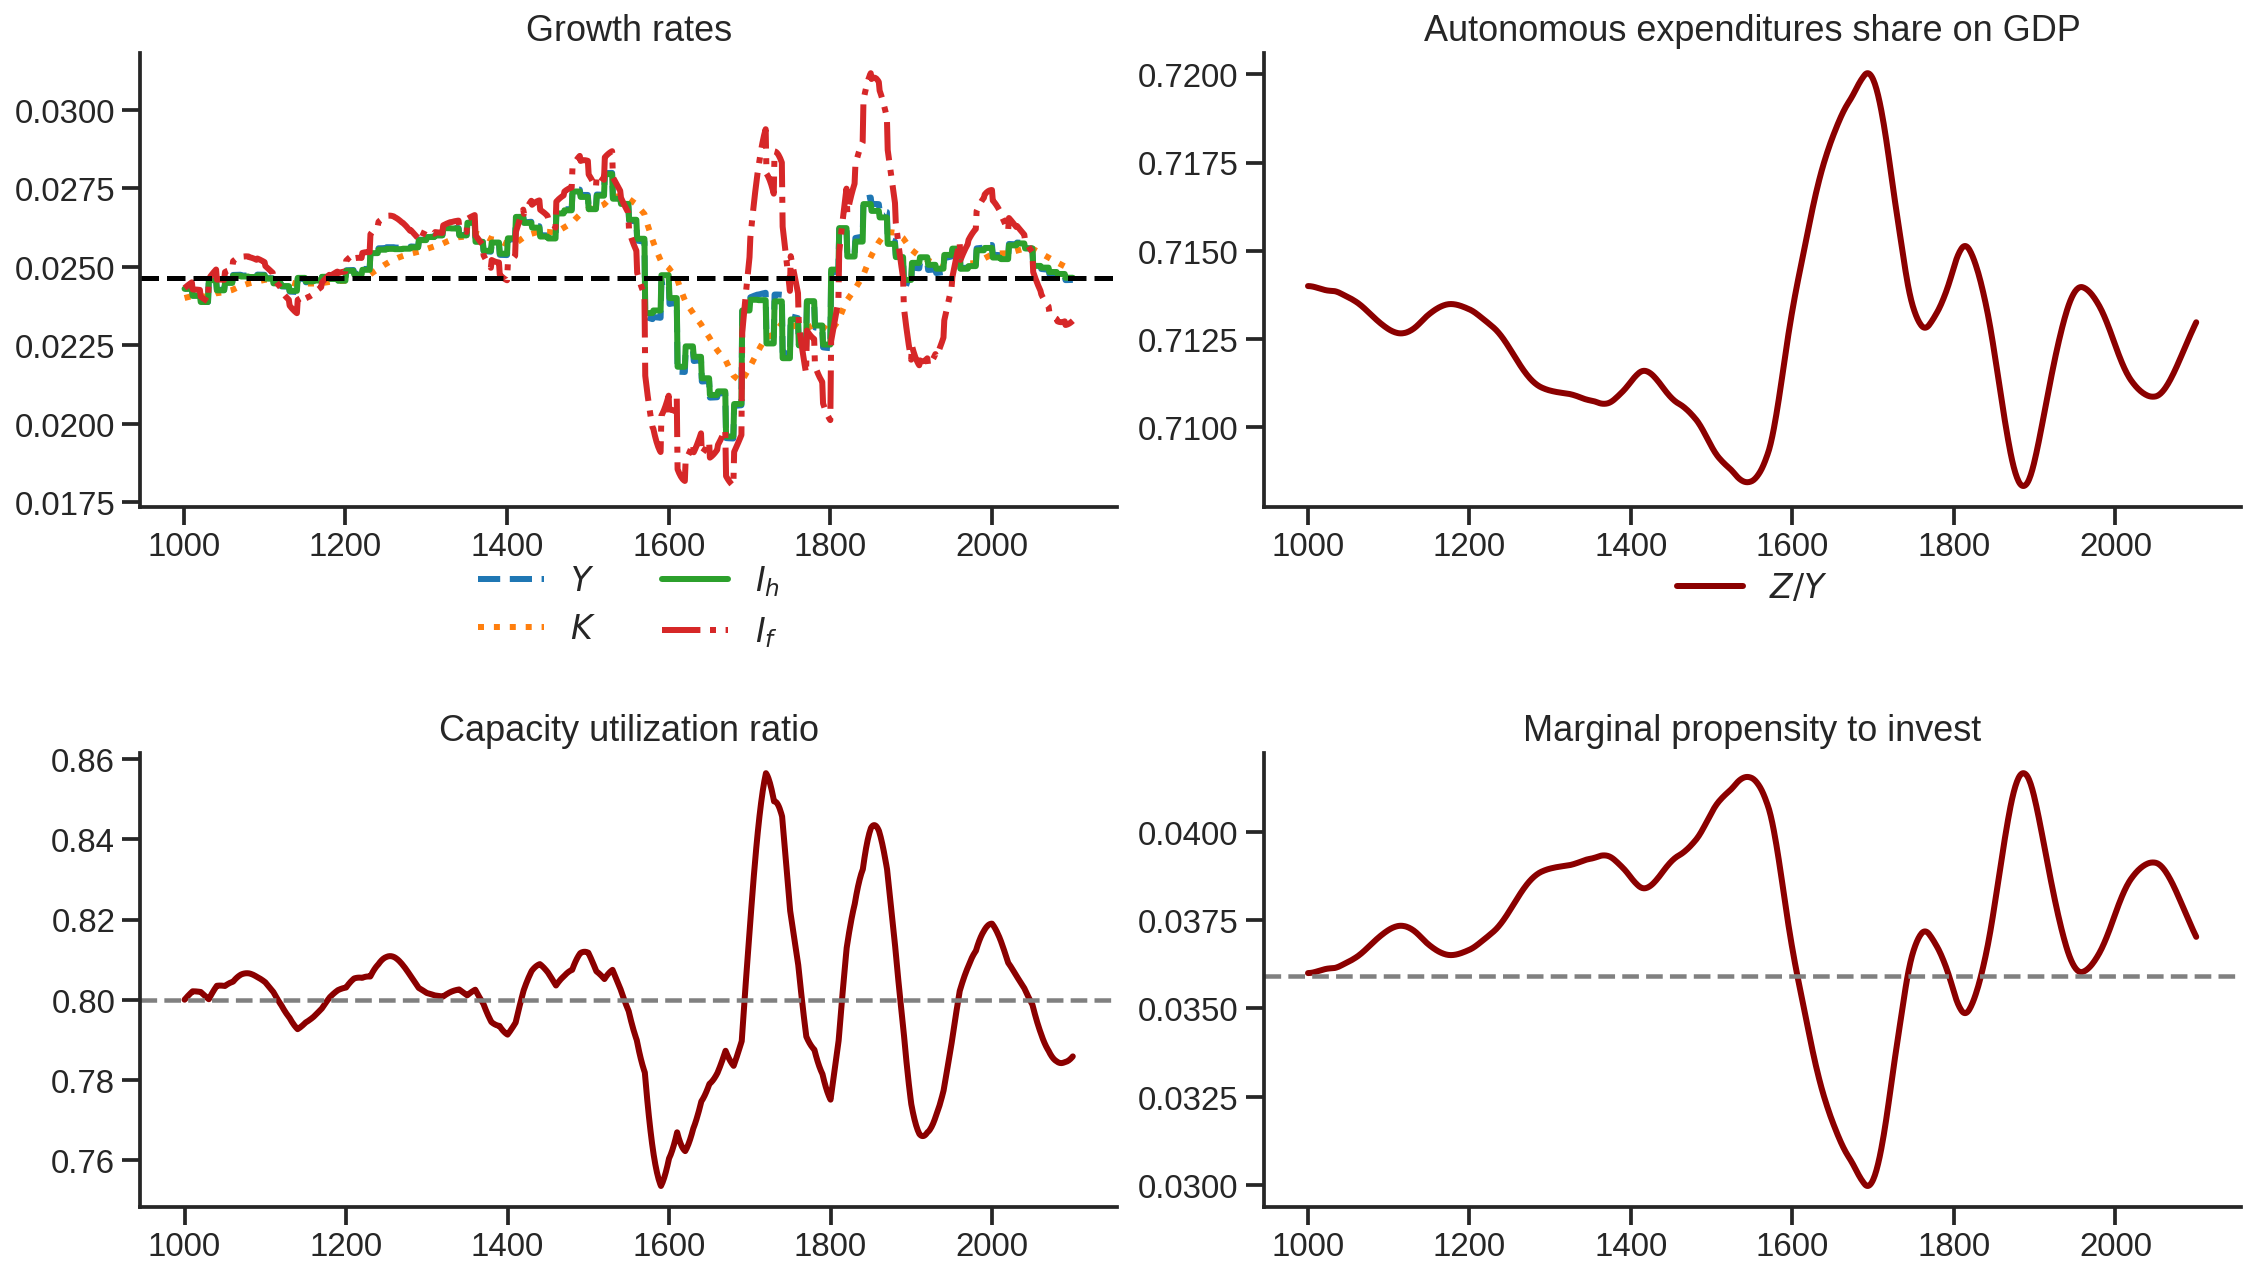

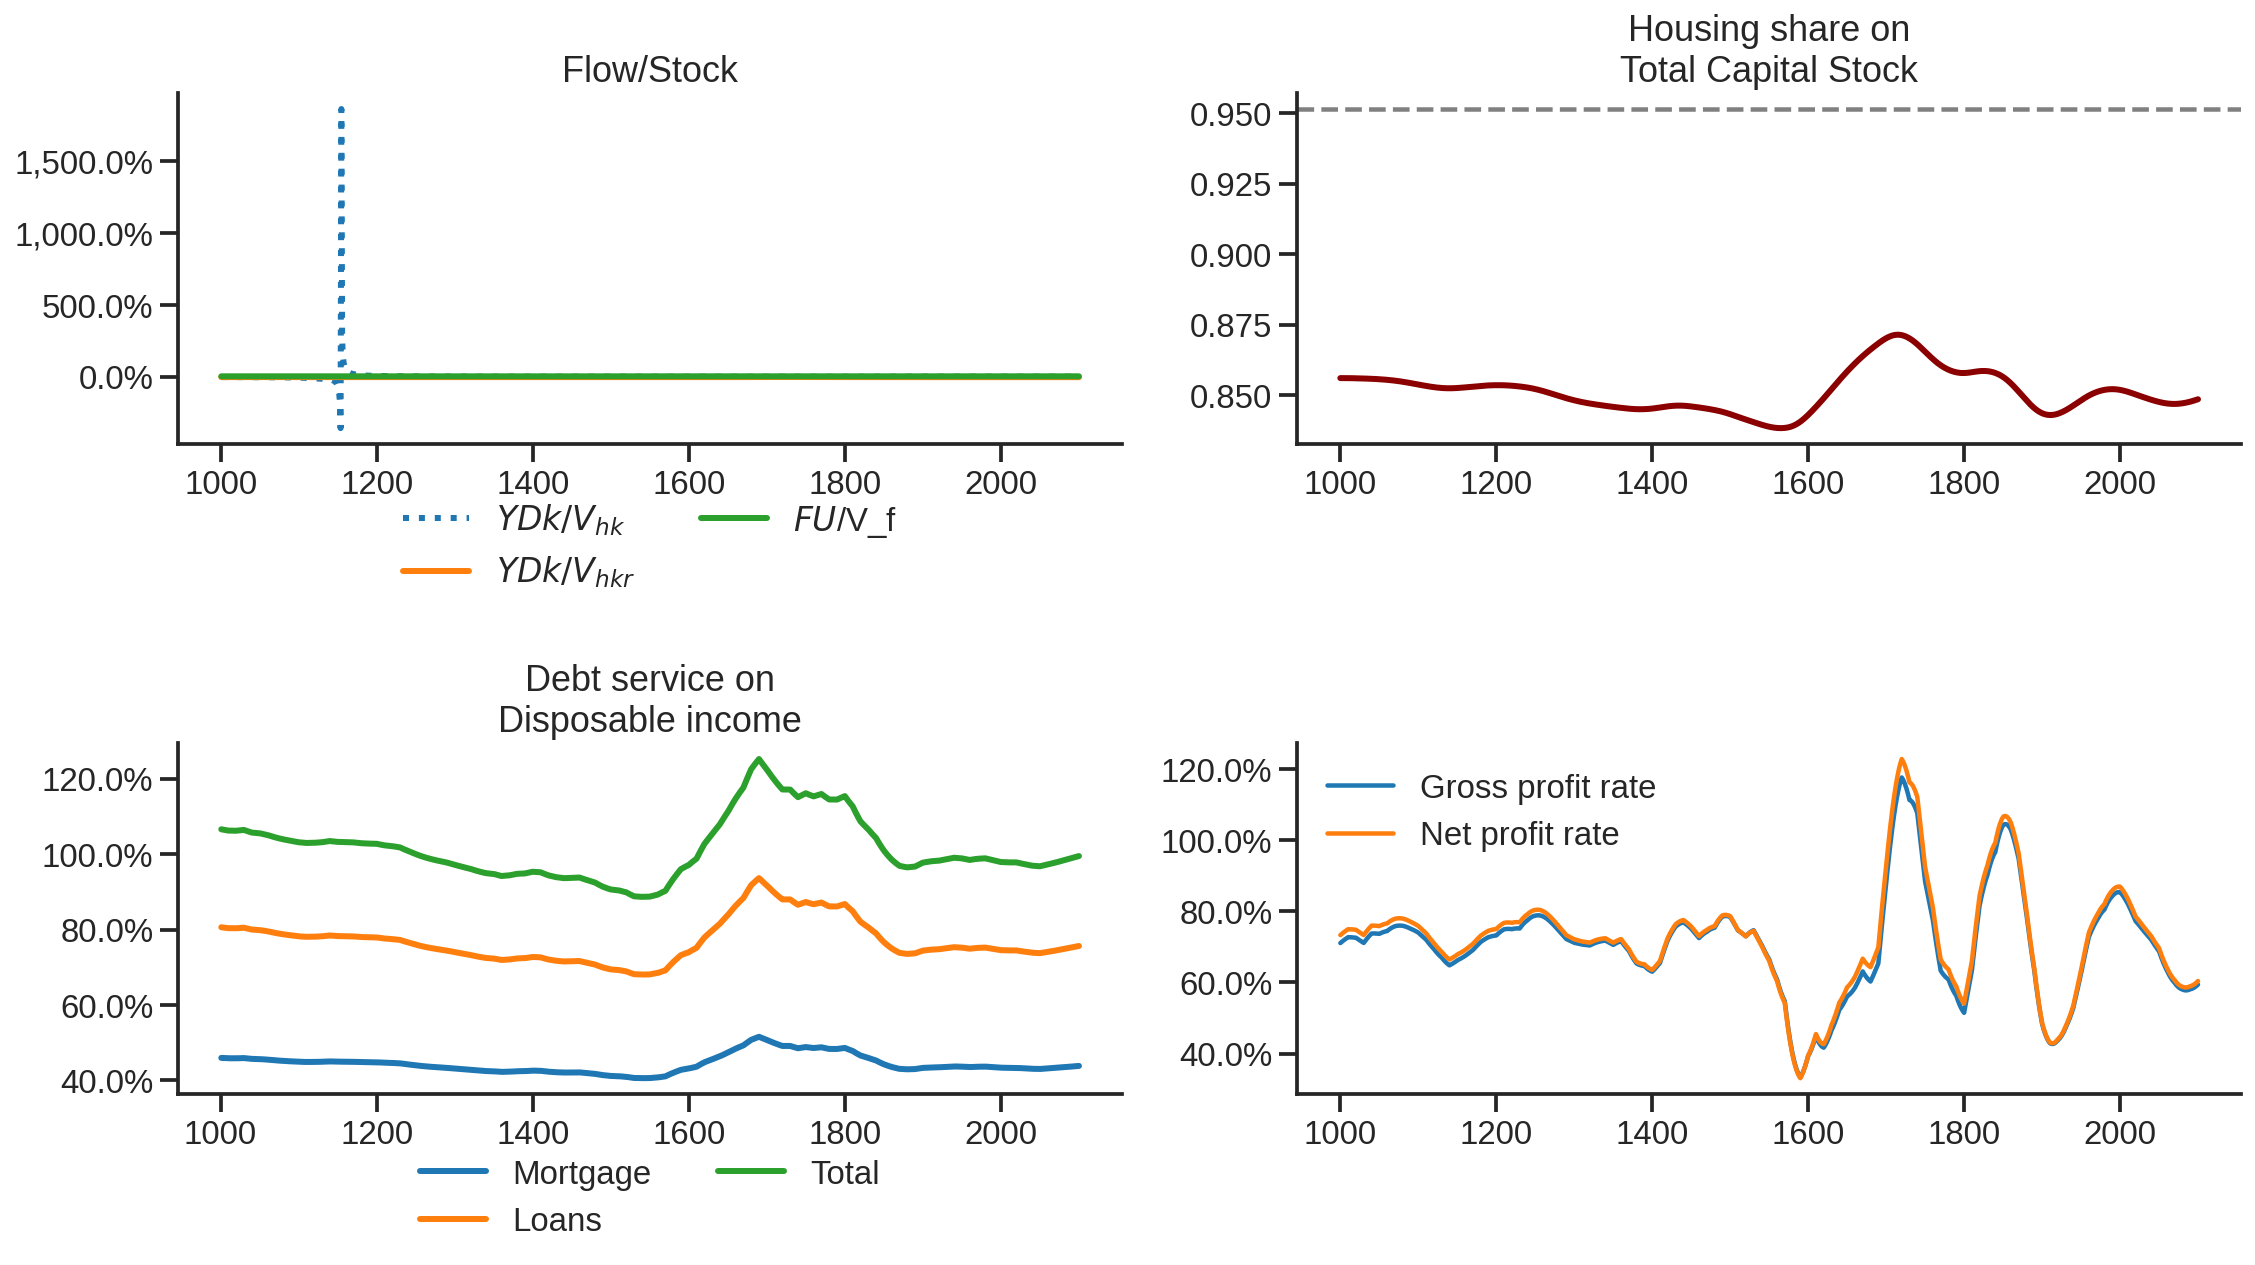

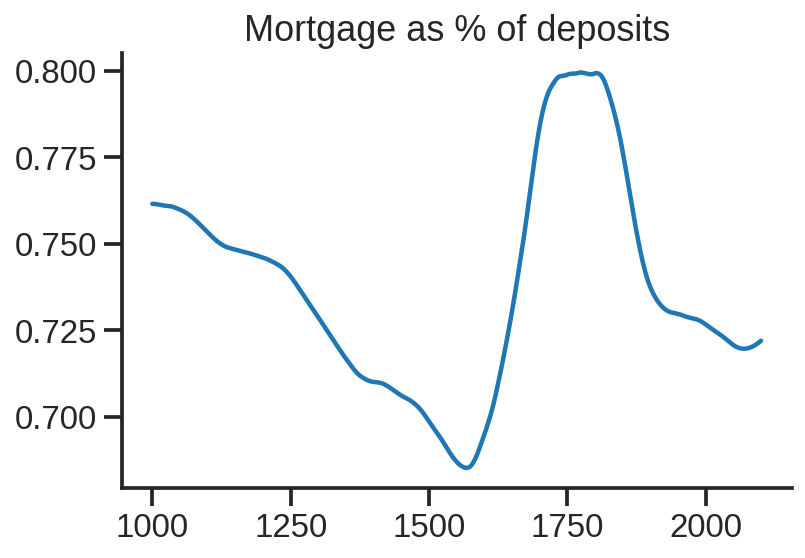

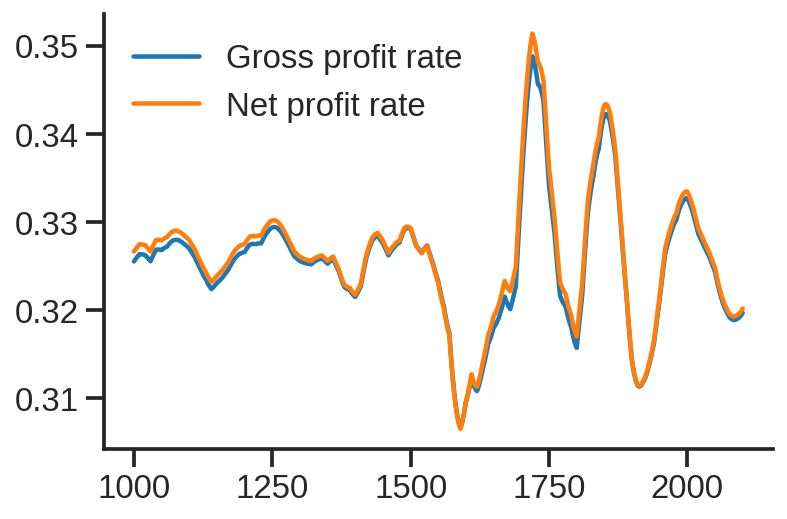

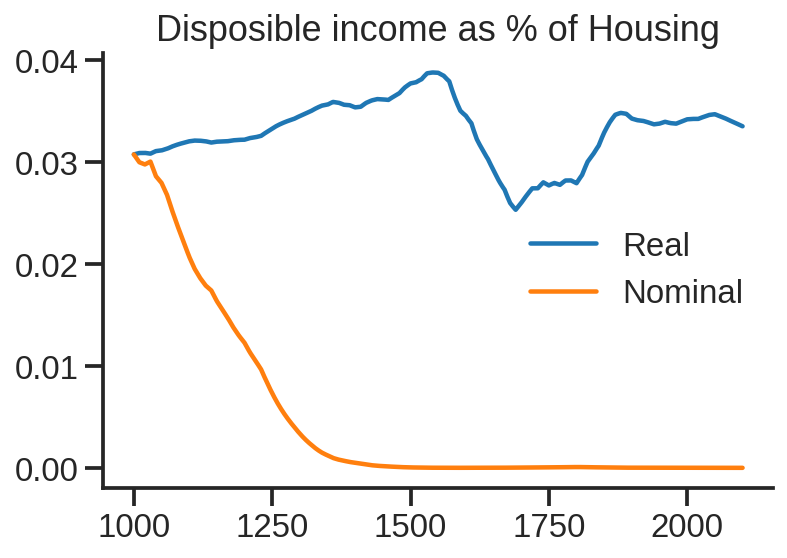

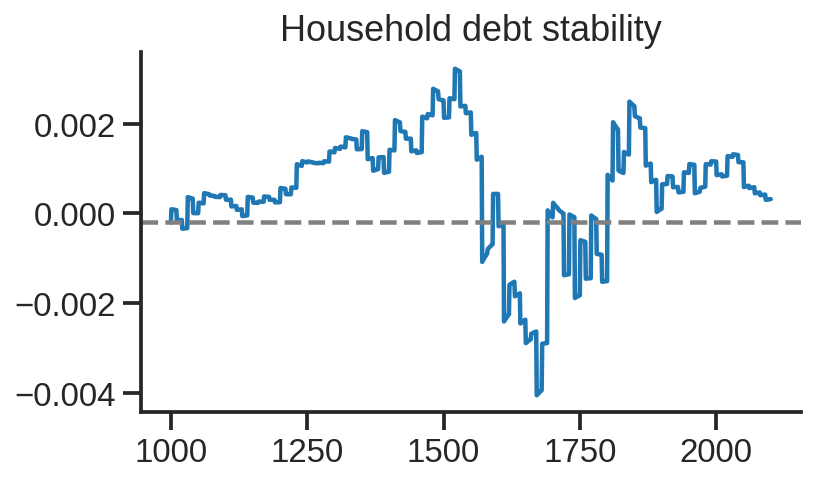

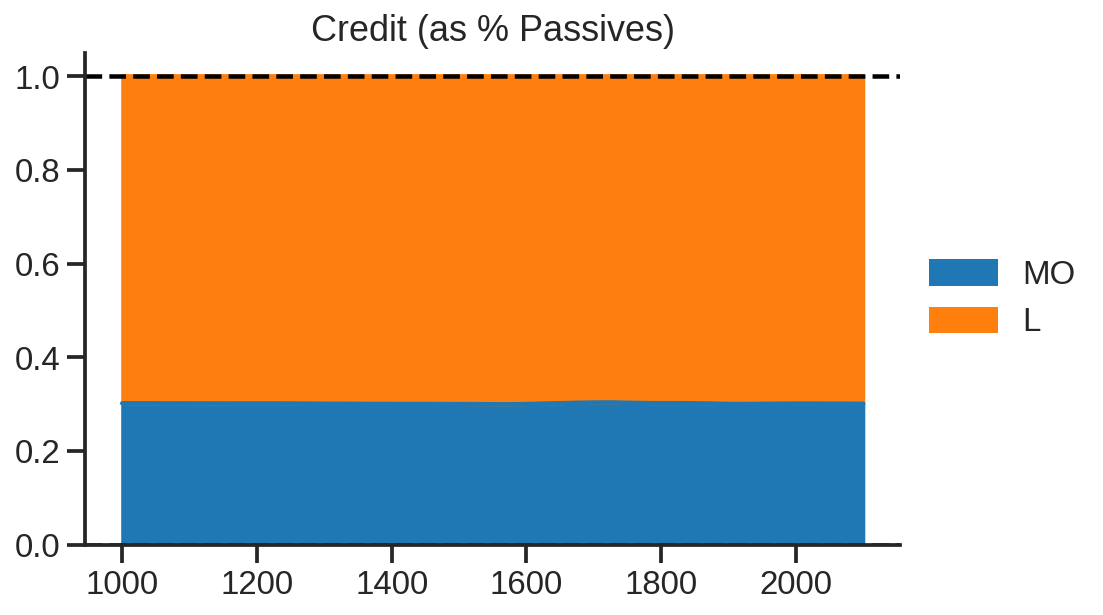

In [3]:
initial=1000
shock_duration=10 ## Warning 10

df = SolveSFC(model(real=1, gC=0.02), time=initial)
base = model()
SolveSFC(base, time=initial, table=False)

for i in data.index:
    lagged = [key for key in base.solutions[-1].keys()]
    lagged = [i for i in lagged if "__" in i]
    for j in lagged:
        del base.solutions[-1][j]
    base.set_values(base.solutions[-1])
    base.set_values({
            'own':data['Own Interest rate'][i],
            'infla':data['Inflation'][i],
            'rmo':data['Interest rate'][i],
        })
    try: 
        SolveSFC(base, time=shock_duration, table=False)
    except Exception as e:
        print(f'For time = {i}, {e}')
        pass
    
shock = SFCTable(base)[initial:]
clock_plots(shock = shock, filename = 'Clock_Real.svg', variable='real data')
plot_shock(shock = shock, filename = 'Shock_Real.svg', df=df)
plot_norms(shock = shock, filename = 'Shock_RealNorms.svg', df=df)
other_plots(shock, df=df)